# Principal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to use scikit-learn to run PCA on your own. 

## Objectives

In this lab you will: 

- Implement the PCA algorithm using scikit-learn library 
- Determine the optimal number of n components when performing PCA by observing the explained variance 
- Plot the decision boundary of classification experiments to visually inspect their performance 

## Iris dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it. 

In [2]:
from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Before performing PCA and visualizing the principal components, it's helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

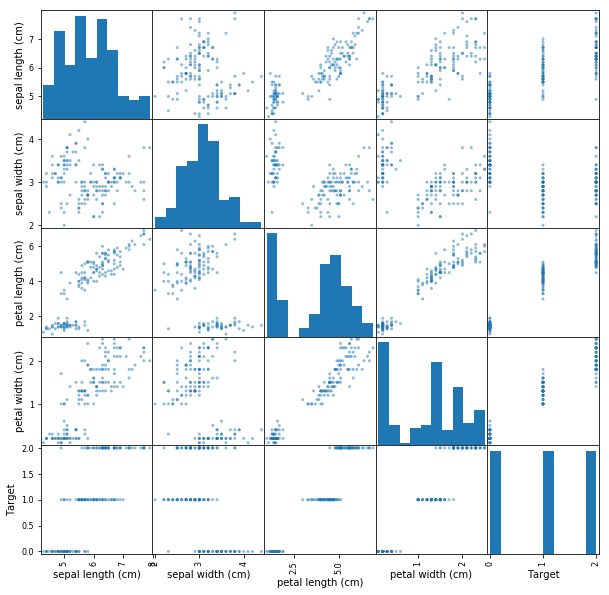

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

<Figure size 288x432 with 0 Axes>

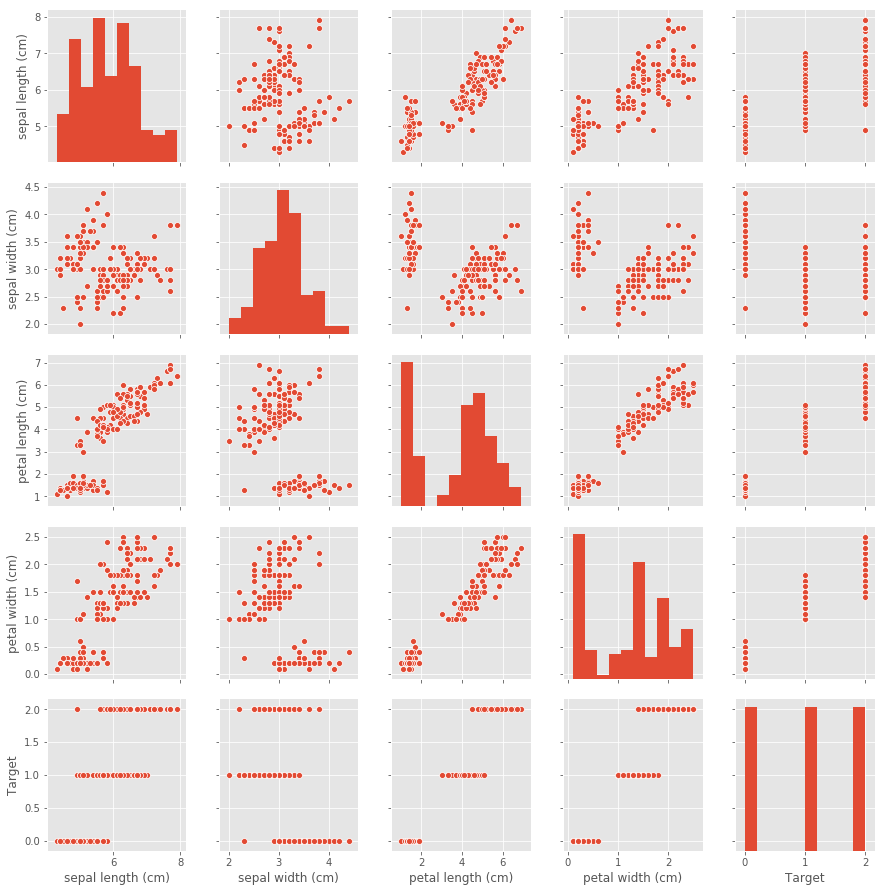

In [11]:
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(4,6));
sns.pairplot(df);

- Assign all columns in the following `features` list to `X` 
- Assign the `'Target'` column to `y` 

In [29]:
# Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = iris.data
y = iris.target

In [30]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [39]:
X.shape

(150, 4)

In [37]:
y[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
y.shape

(150,)

In [32]:
# Create features and target datasets
# features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# X = df
# y = df['Target']

In [33]:
# X.head()

In [34]:
# X.shape

In [35]:
# y.tail()

Standardize all the columns in `X` using `StandardScaler`. 

In [36]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
X_ss = StandardScaler().fit_transform(X)

# Preview X
pd.DataFrame(data=X_ss, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA Projection to 2-D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with two components
- Fit the data to the model
- Extract the first two principal components from the trained model 

In [40]:
# Import PCA
from sklearn.decomposition import PCA

In [41]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=2)

# Fit PCA using transformed dataset for iris
PCA_fit = pca.fit_transform(X)

To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower type) to the principal components in a pandas dataframe.

In [44]:
# Create a new dataset from principal components 
df = pd.DataFrame(data=PCA_fit,
                  columns = ['PC1','PC2'])   # n_components created from PCA
df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [46]:
target = pd.Series(iris.target, name = 'target')
result_df = pd.concat([df, target], axis = 1)
result_df.tail()

,PC1,PC2,target
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2
149,1.390189,-0.282661,2


In [47]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca_v2 = PCA()

# Fit PCA using transformed dataset for iris
PCA_fit_v2 = pca_v2.fit_transform(X)

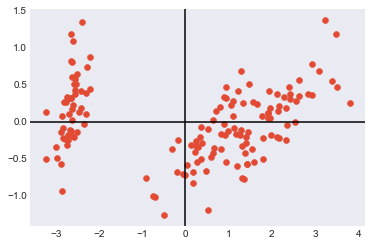

In [61]:
plt.scatter(PCA_fit_v2[:,0], PCA_fit_v2[:,1])  # _________>Q  --- PC1 and PC2
plt.axhline(color='black')
plt.axvline(color='black');

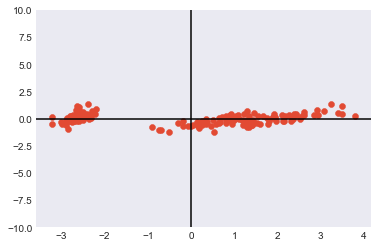

In [62]:
plt.scatter(PCA_fit_v2[:,0], PCA_fit_v2[:,1])
plt.axhline(color='black')
plt.axvline(color='black')
plt.ylim(-10,10);   # _________>Q:Why, does this place all points on the axes?

In [54]:
pca_v2.components_  # _________>Q

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [65]:
pca_v2.mean_  # _________>Q

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [66]:
# Calculate the variance explained by pricipal components
print('Variance of each component:', pca_v2.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca_v2.explained_variance_ratio_))*100, 2))

Variance of each component: [0.92461872 0.05306648 0.01710261 0.00521218]

 Total Variance Explained: 100.0


In [69]:
round(sum((pca_v2.explained_variance_ratio_)*100),2)

100.0

Great, you now have a set of two dimensions, reduced from four against our target variable, the flower type. 

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

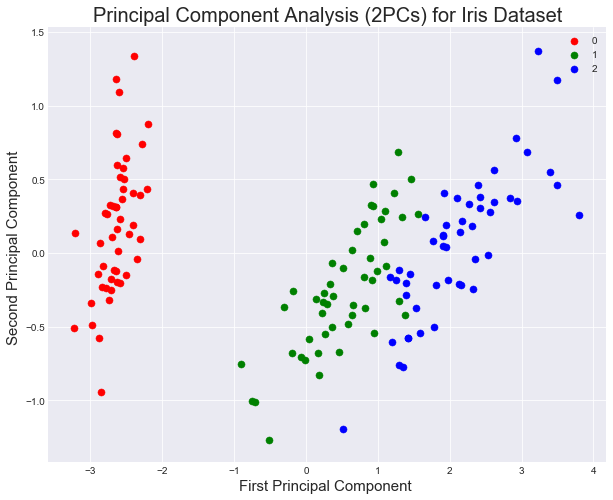

In [63]:
# Principal Componets scatter plot

plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = iris['target'] == target        # _________>Q   -- Returning 3 arrays with T/F values
    display(indicesToKeep)
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], # _________>Q
               result_df.loc[indicesToKeep, 'PC2'], # _________>Q
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()


## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to that captured from your two primary components.

In [64]:
# Calculate the variance explained by pricipal components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.92461872 0.05306648]

 Total Variance Explained: 97.77


As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of a Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a train/test split of 80/20
- For reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making prediction

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import datetime
import time
import dateutil

In [80]:
# Classification - complete Iris dataset
X = iris.data
y = iris.target
X_feature = iris.feature_names
y_feature = iris.target_names
data_desc = iris.DESCR
# Your code here 


In [101]:
data_desc

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [102]:
st_time = time.time()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 9)
clf_KNN = KNeighborsClassifier()
fit_KNN = clf_KNN.fit(X_train, y_train)
y_pred = fit_KNN.predict(X_test)

acc = metrics.accuracy_score(y_pred, y_test)

In [104]:
end_time = time.time()
elapsed_time = end_time - st_time

In [122]:
print(f'Accuracy Score =  {acc*100.0}')
print(f'Elapsed Time:  {elapsed_time}')

Accuracy Score =  100.0
Elapsed Time:  0.012989044189453125


Great, so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may be different based on the load on your cpu and number of processes running on your PC. 

Now repeat the above process for dataset made from principal components: 

- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a train/test split of 80/20
- For reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making prediction

In [109]:
X=result_df[['PC1', 'PC2']]
y=result_df['target']


In [112]:
X,y

(          PC1       PC2
 0   -2.684126  0.319397
 1   -2.714142 -0.177001
 2   -2.888991 -0.144949
 3   -2.745343 -0.318299
 4   -2.728717  0.326755
 5   -2.280860  0.741330
 6   -2.820538 -0.089461
 7   -2.626145  0.163385
 8   -2.886383 -0.578312
 9   -2.672756 -0.113774
 10  -2.506947  0.645069
 11  -2.612755  0.014730
 12  -2.786109 -0.235112
 13  -3.223804 -0.511395
 14  -2.644750  1.178765
 15  -2.386039  1.338062
 16  -2.623528  0.810680
 17  -2.648297  0.311849
 18  -2.199820  0.872839
 19  -2.587986  0.513560
 20  -2.310256  0.391346
 21  -2.543705  0.432996
 22  -3.215939  0.133468
 23  -2.302733  0.098709
 24  -2.355754 -0.037282
 25  -2.506669 -0.146017
 26  -2.468820  0.130951
 27  -2.562320  0.367719
 28  -2.639535  0.312040
 29  -2.631989 -0.196961
 ..        ...       ...
 120  2.427818  0.378196
 121  1.199001 -0.606092
 122  3.499920  0.460674
 123  1.388766 -0.204399
 124  2.275431  0.334991
 125  2.614090  0.560901
 126  1.258508 -0.179705
 127  1.291132 -0.116669


In [123]:
# Classification - reduced (PCA) Iris dataset
X=result_df[['PC1', 'PC2']]
y=result_df['target']

st_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 9)
clf_KNN = KNeighborsClassifier()
fit_KNN = clf_KNN.fit(X_train, y_train)
y_pred = fit_KNN.predict(X_test)

acc = metrics.accuracy_score(y_pred, y_test)

end_time = time.time()
elapsed_time = end_time - st_time

print(f'Accuracy Score =  {acc*100.0}')
print(f'Elapsed Time:  {elapsed_time}')

Accuracy Score =  100.0
Elapsed Time:  0.011993646621704102


In [124]:
# Run the classifer on PCA'd data
X = result_df[['PC1', 'PC2']]
y = result_df['target']

start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)

Accuracy: 1.0
Time Taken: 0.011993169784545898


Although some accuracy is lost in this representation of the data, we were able to use half of the number of features to train the model!

In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

## Visualize the learned decision boundary 

Run the cell below to visualize the decision boundary learned by the k-nearest neighbor classification model trained using the principal components of the data. 

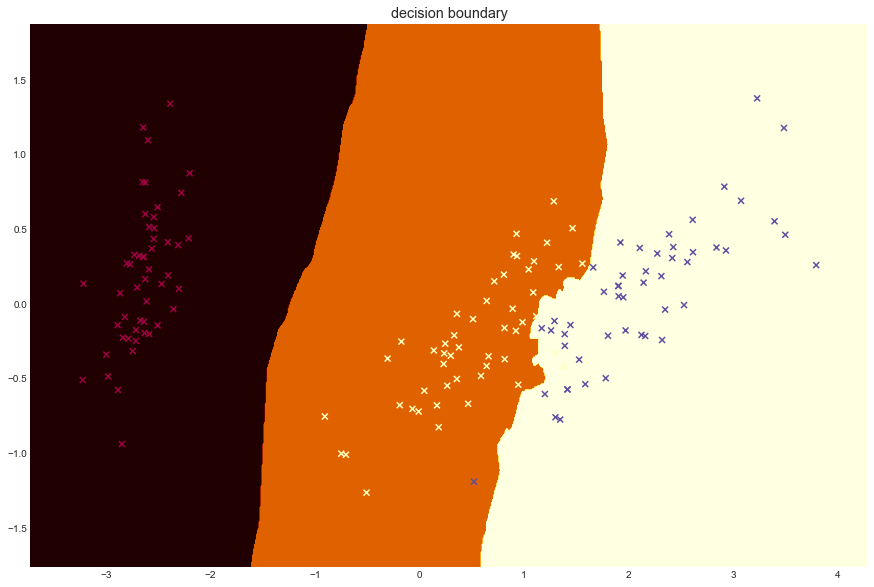

In [125]:
# Plot decision boundary using principal components 
import numpy as np 
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: model.predict(x))

plt.title('decision boundary');

## Summary 

In this lab you applied PCA to the popular Iris dataset. You looked at performance of a simple classifier and impact of PCA on it. From here, you'll continue to explore PCA at more fundamental levels.